In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as  pd
import os
import cv2

import pyOpenLPT as lpt
redirector = lpt.PythonStreamRedirector()

%matplotlib widget

from fileIO import *

In [2]:
import pybind11
print(np.__version__)
print(pd.__version__)
print(pybind11.__version__)

1.26.2
2.1.4
2.13.0


In [2]:
# run openlpt 
config_file = '../../test/inputs/test_STB/config_python.txt'
lpt.run(config_file)

**************
OpenLPT start!
**************

Load config file: ../../test/inputs/test_STB/config_python.txt

Start Calibrating OTF!
Camera 0
	Number of found tracers in each image: 11679(1000),11674(1000),11700(1000),11699(1000),11714(1000),
	a_mean = 98.0258; a_std = 15.0473; a_max = 124; a = 124
	(a,b,c,alpha) = 124,1.43357,1.42686,0
Camera 1
	Number of found tracers in each image: 11470(1000),11478(1000),11503(1000),11488(1000),11492(1000),
	a_mean = 98.6848; a_std = 15.3144; a_max = 124; a = 124
	(a,b,c,alpha) = 124,1.43282,1.43075,0
Camera 2
	Number of found tracers in each image: 11462(1000),11409(1000),11428(1000),11409(1000),11370(1000),
	a_mean = 98.0996; a_std = 15.1844; a_max = 124; a = 124
	(a,b,c,alpha) = 124,1.42548,1.41584,0
Camera 3
	Number of found tracers in each image: 11331(1000),11335(1000),11305(1000),11314(1000),11352(1000),
	a_mean = 97.8346; a_std = 15.1195; a_max = 124; a = 124
	(a,b,c,alpha) = 124,1.44211,1.41867,0
Finish Calibrating OTF!

0,-1
Initial phase

In [5]:
tracks = load_tracks('../../test/results/test_STB/Tracer_0/')
tracks.head()

,TrackID,FrameID,WorldX,WorldY,WorldZ,Error,Ncam,cam0_x(col),cam0_y(row),cam1_x(col),cam1_y(row),cam2_x(col),cam2_y(row),cam3_x(col),cam3_y(row)
0,0,0,-12.9186,-13.7532,-19.7187,0.000084,3,936.675,986.563,313.880,981.137,967.991,953.624,-10.000,-10.00
1,0,1,-12.9011,-13.8413,-19.7590,0.000107,3,938.572,987.571,315.093,982.002,968.690,954.347,-10.000,-10.00
2,0,2,-12.8735,-13.9369,-19.7995,0.012098,3,940.569,988.594,316.600,982.865,969.264,955.041,-10.000,-10.00
3,0,3,-12.8623,-14.0218,-19.8426,0.001561,3,942.440,989.660,317.641,983.798,970.064,955.849,-10.000,-10.00
4,0,4,-12.8436,-14.1135,-19.8838,0.000000,4,944.416,990.691,318.911,984.679,970.786,956.582,336.405,1071.21


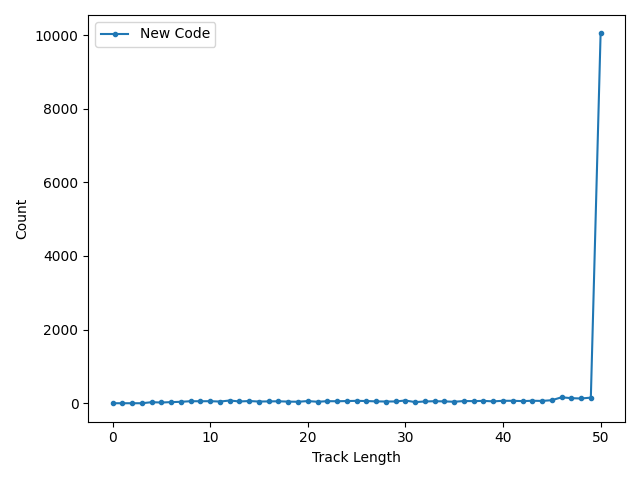

In [10]:
# count track length
frame_start = 0
frame_end = 49

track_length = tracks.groupby('TrackID').size()
ncount, bins = np.histogram(track_length, bins=range(0, 52, 1))

plt.close('all')
plt.figure()
plt.plot(bins[:-1], ncount, '.-', label='New Code')
plt.xlabel('Track Length')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()


Text(0.5, 0, 'Z')

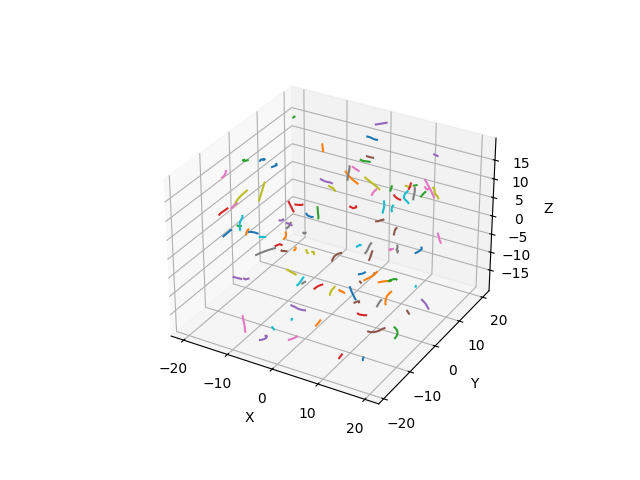

In [11]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_plot = 100
id_list = np.random.choice(tracks['TrackID'].unique(), n_plot, replace=False)
for i in range(n_plot):
    track = tracks[tracks['TrackID'] == id_list[i]]
    ax.plot(track['WorldX'], track['WorldY'], track['WorldZ'])
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


(1024.0, 0.0)

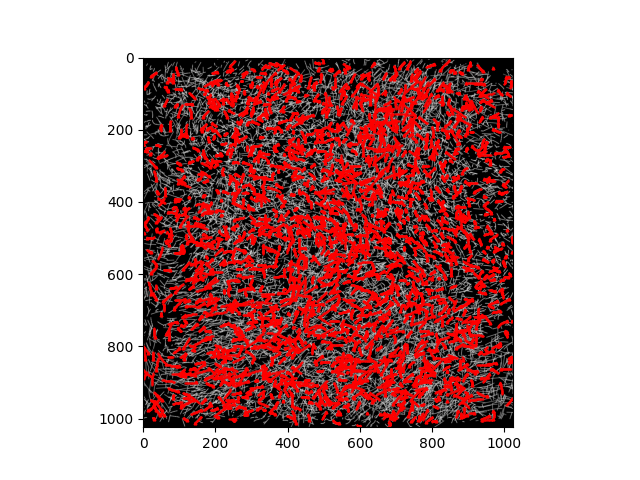

In [12]:
# load 2d tracks 
# create combine image
cam_id = 0
folder = '../../test/inputs/test_STB/imgFile/cam'+str(cam_id+1)

frame_start = 0
frame_end = 20

img_combine = cal_img_combine(1024, 1024, folder, 'Img{:05d}.tif', frame_start, frame_end)

plt.close('all')
plt.figure()
plt.imshow(img_combine, cmap='gray')


# plot tracks
color = 'r'
tracks_filter = tracks[np.logical_and(tracks['FrameID'] >= frame_start, tracks['FrameID'] <= frame_end)]
# n_plot = tracks_filter['TrackID'].unique().shape[0]
n_plot = 2000
id_list = np.random.choice(tracks_filter['TrackID'].unique(), n_plot, replace=False)
for i in range(n_plot):
    track = tracks_filter[tracks_filter['TrackID'] == id_list[i]]
    plt.plot(track['cam'+str(cam_id)+'_x(col)'], track['cam'+str(cam_id)+'_y(row)'], color+'.', markersize=1)    
    plt.plot(track['cam'+str(cam_id)+'_x(col)'].values[0], track['cam'+str(cam_id)+'_y(row)'].values[0], color+'^', markersize=2)

plt.xlim(0,1024)
plt.ylim(1024,0)